In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import plotly.express as px
from itertools import product
import warnings
import statsmodels.api as sm
plt.style.use('seaborn-darkgrid')

In [93]:
dataset = pd.read_csv('Bitcoin.csv')


In [94]:
dataset.head()


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
dataset.shape

(4572257, 8)

In [96]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572257 entries, 0 to 4572256
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 279.1 MB


In [97]:
dataset['Timestamp'] = [datetime.fromtimestamp(x) for x in dataset['Timestamp']]

In [98]:
dataset.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 13:22:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,2011-12-31 13:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 13:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 13:25:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 13:26:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
missing_values = dataset.isnull().sum()
missing_per = (missing_values/dataset.shape[0])*100
missing_table = pd.concat([missing_values,missing_per], axis=1, ignore_index=True) 
missing_table.rename(columns={0:'Total Missing Values',1:'Missing %'}, inplace=True)
missing_table

,Total Missing Values,Missing %
Timestamp,0,0.000000
Open,1241716,27.157616
High,1241716,27.157616
Low,1241716,27.157616
Close,1241716,27.157616
Volume_(BTC),1241716,27.157616
Volume_(Currency),1241716,27.157616
Weighted_Price,1241716,27.157616


In [100]:
pd.set_option('display.max_rows', 1500)

a = dataset.set_index('Timestamp')

a = a['2019-11-01 00:15:00':'2019-11-01 02:24:00']

a['ffill'] = a['Open'].fillna(method='ffill') # Imputation using ffill/pad
a['bfill'] = a['Open'].fillna(method='bfill') # Imputation using bfill/pad
a['interp'] = a['Open'].interpolate()         # Imputation using interpolation

a


,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,ffill,bfill,interp
Timestamp,,,,,,,,,,
2019-11-01 00:15:00,9245.61,9245.61,9238.70,9238.70,1.303696,1.205250e+04,9244.868342,9245.61,9245.61,9245.61
2019-11-01 00:16:00,9237.75,9249.94,9237.75,9242.09,4.442168,4.107676e+04,9247.007936,9237.75,9237.75,9237.75
2019-11-01 00:17:00,9242.09,9250.73,9242.09,9247.59,0.200352,1.852452e+03,9246.000641,9242.09,9242.09,9242.09
2019-11-01 00:18:00,9247.20,9256.96,9247.20,9256.96,1.254069,1.159798e+04,9248.280434,9247.20,9247.20,9247.20
2019-11-01 00:19:00,9247.34,9257.51,9247.24,9257.48,0.138718,1.283272e+03,9250.925170,9247.34,9247.34,9247.34
2019-11-01 00:20:00,9257.49,9257.49,9247.24,9247.44,0.221101,2.046260e+03,9254.850775,9257.49,9257.49,9257.49
2019-11-01 00:21:00,9247.49,9249.07,9247.24,9247.24,1.063803,9.839155e+03,9249.034498,9247.49,9247.49,9247.49
2019-11-01 00:22:00,9247.27,9254.23,9244.18,9254.00,2.019336,1.868118e+04,9251.149888,9247.27,9247.27,9247.27
2019-11-01 00:23:00,9244.85,9253.95,9243.98,9253.50,1.230669,1.137747e+04,9244.947187,9244.85,9244.85,9244.85


In [101]:
def fill_missing(df):
    ### function to impute missing values using interpolation ###
    df['Open'] = df['Open'].interpolate()
    df['Close'] = df['Close'].interpolate()
    df['Weighted_Price'] = df['Weighted_Price'].interpolate()

    df['Volume_(BTC)'] = df['Volume_(BTC)'].interpolate()
    df['Volume_(Currency)'] = df['Volume_(Currency)'].interpolate()
    df['High'] = df['High'].interpolate()
    df['Low'] = df['Low'].interpolate()

    print(df.head())
    print(df.isnull().sum())

In [102]:
fill_missing(dataset)

            Timestamp  Open  High   Low  Close  Volume_(BTC)  \
0 2011-12-31 13:22:00  4.39  4.39  4.39   4.39      0.455581   
1 2011-12-31 13:23:00  4.39  4.39  4.39   4.39      0.555046   
2 2011-12-31 13:24:00  4.39  4.39  4.39   4.39      0.654511   
3 2011-12-31 13:25:00  4.39  4.39  4.39   4.39      0.753977   
4 2011-12-31 13:26:00  4.39  4.39  4.39   4.39      0.853442   

   Volume_(Currency)  Weighted_Price  
0           2.000000            4.39  
1           2.436653            4.39  
2           2.873305            4.39  
3           3.309958            4.39  
4           3.746611            4.39  
Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64


In [103]:
dataset_non_indexed = dataset.copy()

In [104]:
dataset = dataset.set_index('Timestamp')
dataset.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 13:22:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.39
2011-12-31 13:23:00,4.39,4.39,4.39,4.39,0.555046,2.436653,4.39
2011-12-31 13:24:00,4.39,4.39,4.39,4.39,0.654511,2.873305,4.39
2011-12-31 13:25:00,4.39,4.39,4.39,4.39,0.753977,3.309958,4.39
2011-12-31 13:26:00,4.39,4.39,4.39,4.39,0.853442,3.746611,4.39


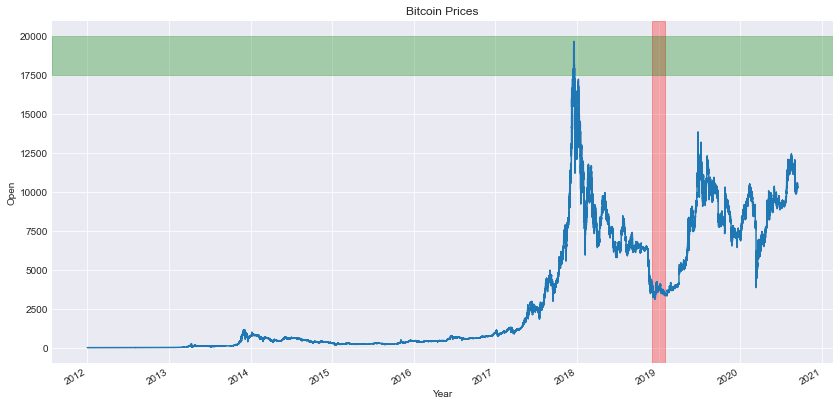

In [105]:
ax = dataset['Open'].plot(title='Bitcoin Prices', grid=True, figsize=(14,7))
ax.set_xlabel('Year')
ax.set_ylabel('Open')

ax.axvspan('2018-12-01','2019-01-31',color='red', alpha=0.3)
ax.axhspan(17500,20000, color='green',alpha=0.3)

Text(0, 0.5, 'Open')

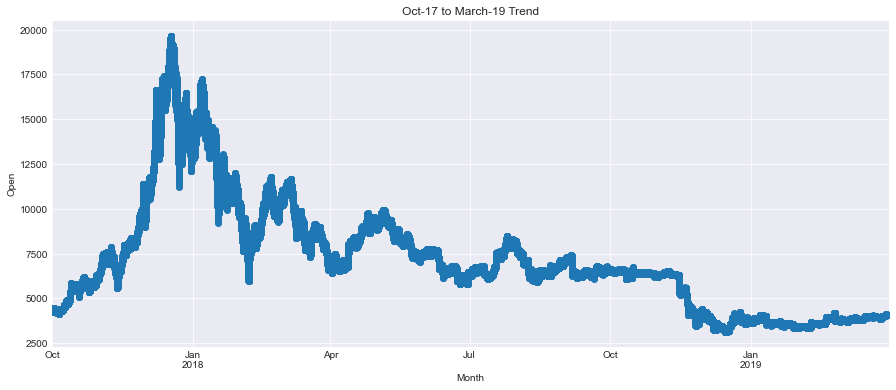

In [106]:
ax = dataset.loc['2017-10':'2019-03','Open'].plot(marker='o', linestyle='-',figsize=(15,6), title="Oct-17 to March-19 Trend", grid=True)
ax.set_xlabel('Month')
ax.set_ylabel('Open')

<AxesSubplot:xlabel='Open', ylabel='Density'>

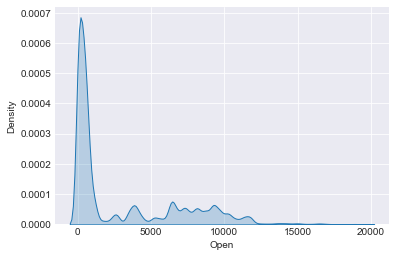

In [107]:
sns.kdeplot(dataset['Open'], shade=True)

No handles with labels found to put in legend.


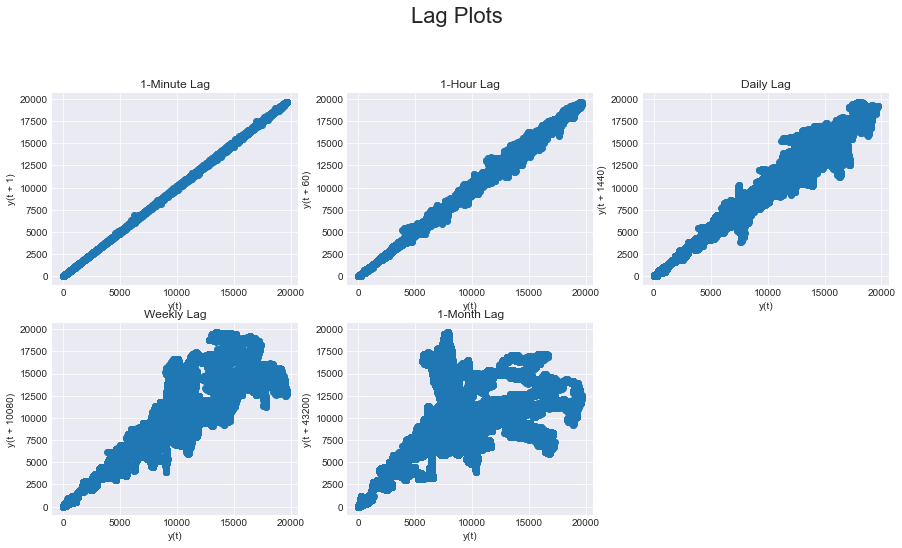

In [108]:
plt.figure(figsize=(15,12))
plt.suptitle('Lag Plots', fontsize=22)

plt.subplot(3,3,1)
pd.plotting.lag_plot(dataset['Open'], lag=1) #minute lag
plt.title('1-Minute Lag')

plt.subplot(3,3,2)
pd.plotting.lag_plot(dataset['Open'], lag=60) #hourley lag
plt.title('1-Hour Lag')

plt.subplot(3,3,3)
pd.plotting.lag_plot(dataset['Open'], lag=1440) #Daily lag
plt.title('Daily Lag')

plt.subplot(3,3,4)
pd.plotting.lag_plot(dataset['Open'], lag=10080) #weekly lag
plt.title('Weekly Lag')

plt.subplot(3,3,5)
pd.plotting.lag_plot(dataset['Open'], lag=43200) #month lag
plt.title('1-Month Lag')

plt.legend()
plt.show()

In [109]:
hourly_data = dataset.resample('1H').mean()
hourly_data = hourly_data.reset_index()

hourly_data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 13:00:00,4.39,4.39,4.39,4.39,2.295689,10.078075,4.39
1,2011-12-31 14:00:00,4.39,4.39,4.39,4.39,7.169489,31.474059,4.39
2,2011-12-31 15:00:00,4.39,4.39,4.39,4.39,13.137408,57.673222,4.39
3,2011-12-31 16:00:00,4.39,4.39,4.39,4.39,19.105327,83.872385,4.39
4,2011-12-31 17:00:00,4.39,4.39,4.39,4.39,25.073246,110.071548,4.39


In [110]:
dataset_daily = dataset.resample("24H").mean() 

In [111]:
import plotly.express as px

dataset_daily.reset_index(inplace=True)
fig = px.line(dataset_daily, x='Timestamp', y='Open', title='Open Price with Range Slider and Selectors')
fig.update_layout(hovermode="x")

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(step="all")
            
        ])
    )
)
fig.show()

In [112]:
plot_ = dataset_daily.set_index("Timestamp")["2017-12"]

C:\Users\Asus\AppData\Local\Temp/ipykernel_11408/1178485484.py:1: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



In [113]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Candlestick(x= plot_.index,
                    open=plot_['Open'],
                    high=plot_['High'],
                    low=plot_['Low'],
                    close=plot_['Close']))
fig.show()

In [114]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [115]:
fill_missing(dataset_daily)

   Timestamp      Open      High       Low     Close  Volume_(BTC)  \
0 2011-12-31  4.422837  4.426677  4.422837  4.426677     24.024874   
1 2012-01-01  4.677625  4.677625  4.677625  4.677625      5.883361   
2 2012-01-02  4.991701  4.991701  4.991701  4.991701     13.503075   
3 2012-01-03  5.175495  5.175495  5.175495  5.175495     11.136690   
4 2012-01-04  5.120500  5.133742  5.120500  5.133742      8.327158   

   Volume_(Currency)  Weighted_Price  
0         105.980529        4.424286  
1          27.923145        4.677625  
2          67.432386        4.991701  
3          56.749845        5.175495  
4          43.510443        5.125202  
Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64


In [116]:
pip install kpss-py3

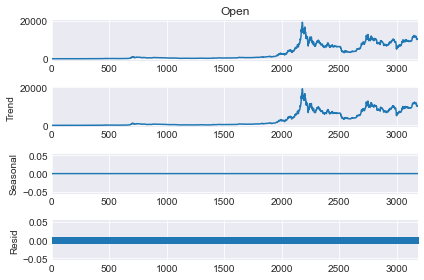

<Figure size 1080x864 with 0 Axes>

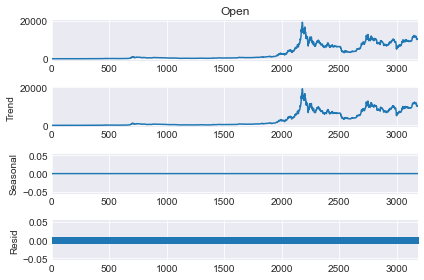

In [118]:
plt.figure(figsize=(15,12))
series = dataset_daily.Open
result = seasonal_decompose(series, model='additive',period=1)
result.plot()

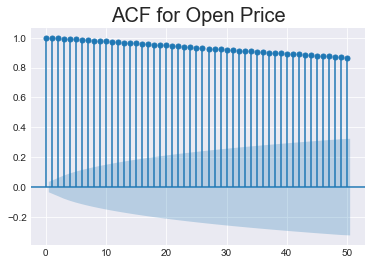

In [119]:
acf = plot_acf(series, lags=50, alpha=0.05)
plt.title("ACF for Open Price", size=20)
plt.show()

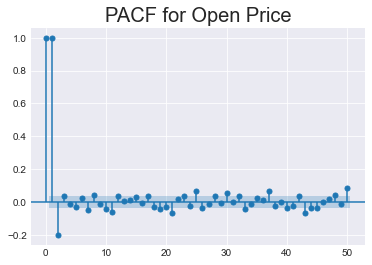

In [120]:
plot_pacf(series, lags=50, alpha=0.05, method='ols')
plt.title("PACF for Open Price", size=20)
plt.show()

In [121]:
stats, p, lags, critical_values = kpss(series, 'ct')

C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning:

The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"

C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




In [122]:
print(f'Test Statistics : {stats}')
print(f'p-value : {p}')
print(f'Critical Values : {critical_values}')

if p < 0.05:
    print('Series is not Stationary')
else:
    print('Series is Stationary')

Test Statistics : 0.971924437336919
p-value : 0.01
Critical Values : {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Series is not Stationary


In [123]:
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    
    print (dfoutput)
    
    if p > 0.05:
        print('Series is not Stationary')
    else:
        print('Series is Stationary')

In [124]:
adf_test(series)


Results of Dickey-Fuller Test:
Test Statistic                   -1.279235
p-value                           0.638618
#Lags Used                       29.000000
Number of Observations Used    3151.000000
Critical Value (1%)              -3.432427
Critical Value (5%)              -2.862458
Critical Value (10%)             -2.567259
dtype: float64
Series is Stationary


In [125]:
df = dataset_daily.set_index('Timestamp')

In [126]:
df.reset_index(drop=False, inplace=True)

lag_features = ["Open", "High", "Low", "Close","Volume_(BTC)"]
window1 = 3
window2 = 7
window3 = 30

df_rolled_3d = df[lag_features].rolling(window=window1, min_periods=0)
df_rolled_7d = df[lag_features].rolling(window=window2, min_periods=0)
df_rolled_30d = df[lag_features].rolling(window=window3, min_periods=0)

df_mean_3d = df_rolled_3d.mean().shift(1).reset_index()
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index()
df_mean_30d = df_rolled_30d.mean().shift(1).reset_index()

df_std_3d = df_rolled_3d.std().shift(1).reset_index()
df_std_7d = df_rolled_7d.std().shift(1).reset_index()
df_std_30d = df_rolled_30d.std().shift(1).reset_index()
for feature in lag_features:
    df[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature]
    df[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
    df[f"{feature}_mean_lag{window3}"] = df_mean_30d[feature]
    
    df[f"{feature}_std_lag{window1}"] = df_std_3d[feature]
    df[f"{feature}_std_lag{window2}"] = df_std_7d[feature]
    df[f"{feature}_std_lag{window3}"] = df_std_30d[feature]

df.fillna(df.mean(), inplace=True)

df.set_index("Timestamp", drop=False, inplace=True)
df.head()

C:\Users\Asus\AppData\Local\Temp/ipykernel_11408/2642296565.py:28: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Open_mean_lag3,Open_mean_lag7,...,Close_mean_lag30,Close_std_lag3,Close_std_lag7,Close_std_lag30,Volume_(BTC)_mean_lag3,Volume_(BTC)_mean_lag7,Volume_(BTC)_mean_lag30,Volume_(BTC)_std_lag3,Volume_(BTC)_std_lag7,Volume_(BTC)_std_lag30
Timestamp,,,,,,,,,,,,,,,,,,,,,
2011-12-31,2011-12-31,4.422837,4.426677,4.422837,4.426677,24.024874,105.980529,4.424286,3069.252936,3062.781207,...,3023.029393,71.874940,119.310201,269.539768,9.796556,9.803078,9.814226,3.450220,4.233084,5.254203
2012-01-01,2012-01-01,4.677625,4.677625,4.677625,4.677625,5.883361,27.923145,4.677625,4.422837,4.422837,...,4.426677,71.874940,119.310201,269.539768,24.024874,24.024874,24.024874,3.450220,4.233084,5.254203
2012-01-02,2012-01-02,4.991701,4.991701,4.991701,4.991701,13.503075,67.432386,4.991701,4.550231,4.550231,...,4.552151,0.177447,0.177447,0.177447,14.954117,14.954117,14.954117,12.827987,12.827987,12.827987
2012-01-03,2012-01-03,5.175495,5.175495,5.175495,5.175495,11.136690,56.749845,5.175495,4.697388,4.697388,...,4.698668,0.283099,0.283099,0.283099,14.470437,14.470437,14.470437,9.109362,9.109362,9.109362
2012-01-04,2012-01-04,5.120500,5.133742,5.120500,5.133742,8.327158,43.510443,5.125202,4.948274,4.816915,...,4.817875,0.251760,0.332071,0.332071,10.174375,13.637000,13.637000,3.899942,7.622256,7.622256


In [127]:
df["month"] = df.Timestamp.dt.month
df["week"] = df.Timestamp.dt.week
df["day"] = df.Timestamp.dt.day
df["day_of_week"] = df.Timestamp.dt.dayofweek
df.head()

C:\Users\Asus\AppData\Local\Temp/ipykernel_11408/3147969711.py:2: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Open_mean_lag3,Open_mean_lag7,...,Volume_(BTC)_mean_lag3,Volume_(BTC)_mean_lag7,Volume_(BTC)_mean_lag30,Volume_(BTC)_std_lag3,Volume_(BTC)_std_lag7,Volume_(BTC)_std_lag30,month,week,day,day_of_week
Timestamp,,,,,,,,,,,,,,,,,,,,,
2011-12-31,2011-12-31,4.422837,4.426677,4.422837,4.426677,24.024874,105.980529,4.424286,3069.252936,3062.781207,...,9.796556,9.803078,9.814226,3.450220,4.233084,5.254203,12,52,31,5
2012-01-01,2012-01-01,4.677625,4.677625,4.677625,4.677625,5.883361,27.923145,4.677625,4.422837,4.422837,...,24.024874,24.024874,24.024874,3.450220,4.233084,5.254203,1,52,1,6
2012-01-02,2012-01-02,4.991701,4.991701,4.991701,4.991701,13.503075,67.432386,4.991701,4.550231,4.550231,...,14.954117,14.954117,14.954117,12.827987,12.827987,12.827987,1,1,2,0
2012-01-03,2012-01-03,5.175495,5.175495,5.175495,5.175495,11.136690,56.749845,5.175495,4.697388,4.697388,...,14.470437,14.470437,14.470437,9.109362,9.109362,9.109362,1,1,3,1
2012-01-04,2012-01-04,5.120500,5.133742,5.120500,5.133742,8.327158,43.510443,5.125202,4.948274,4.816915,...,10.174375,13.637000,13.637000,3.899942,7.622256,7.622256,1,1,4,2


In [128]:
df_train = df[df.Timestamp < "2020"]
df_valid = df[df.Timestamp >= "2020"]

print('train shape :', df_train.shape)
print('validation shape :', df_valid.shape)


train shape : (2923, 42)
validation shape : (258, 42)


In [130]:
price_series = dataset_daily.reset_index().Open.values
price_series

array([4.42283699e+00, 4.67762540e+00, 4.99170099e+00, ...,
       1.03495478e+04, 1.04281917e+04, 1.03031036e+04])

In [131]:
price_series.shape

(3181,)

In [132]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))
price_series_scaled = scaler.fit_transform(price_series.reshape(-1,1))

In [133]:
price_series_scaled, price_series_scaled.shape

(array([[4.98683286e-06],
        [1.82496144e-05],
        [3.45985371e-05],
        ...,
        [5.38511169e-01],
        [5.42604907e-01],
        [5.36093558e-01]]),
 (3181, 1))

In [134]:
train_data, test_data = price_series_scaled[0:2923], price_series_scaled[2923:]

In [135]:
test_data

array([[0.37377496],
       [0.37088953],
       [0.37117944],
       [0.38066689],
       [0.38575619],
       [0.38937974],
       [0.40678316],
       [0.42930309],
       [0.41295084],
       [0.40760132],
       [0.42152658],
       [0.42182707],
       [0.42169171],
       [0.43852274],
       [0.45447743],
       [0.45233812],
       [0.45813379],
       [0.46250669],
       [0.46323509],
       [0.44972517],
       [0.44959751],
       [0.45129212],
       [0.44222653],
       [0.43487399],
       [0.43426158],
       [0.43603822],
       [0.44967668],
       [0.46835237],
       [0.48221879],
       [0.48546812],
       [0.48830591],
       [0.48713719],
       [0.48723365],
       [0.48692279],
       [0.48034244],
       [0.48300292],
       [0.50329512],
       [0.50821744],
       [0.50914502],
       [0.52191764],
       [0.51917039],
       [0.51312227],
       [0.53681677],
       [0.53697578],
       [0.5321265 ],
       [0.53314868],
       [0.51643419],
       [0.507

In [136]:
train_data.shape, test_data.shape

((2923, 1), (258, 1))

In [137]:
def windowed_dataset(series, time_step):
    dataX, dataY = [], []
    for i in range(len(series)- time_step-1):
        a = series[i : (i+time_step), 0]
        dataX.append(a)
        dataY.append(series[i+ time_step, 0])
        
    return np.array(dataX), np.array(dataY)

In [138]:
X_train, y_train = windowed_dataset(train_data, time_step=100)
X_test, y_test = windowed_dataset(test_data, time_step=100)

In [139]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2822, 100), (2822,), (157, 100), (157,))

In [140]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [141]:
print(X_train.shape) 
print(X_test.shape)

(2822, 100, 1)
(157, 100, 1)


In [142]:
print(y_train.shape) 
print(y_test.shape)

(2822,)
(157,)


In [143]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [144]:
# Initialising the LSTM
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [145]:
regressor.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_1 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_2 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [146]:
history = regressor.fit(X_train, y_train, validation_split=0.1, epochs = 50, batch_size = 32, verbose=1, shuffle=False)

Epoch 1/50
80/80 [==============================] - 35s 270ms/step - loss: 0.0051 - val_loss: 0.0354
Epoch 2/50
80/80 [==============================] - 20s 251ms/step - loss: 0.0191 - val_loss: 0.0602
Epoch 3/50
80/80 [==============================] - 19s 243ms/step - loss: 0.0203 - val_loss: 0.0091
Epoch 4/50
80/80 [==============================] - 19s 233ms/step - loss: 0.0231 - val_loss: 0.0069
Epoch 5/50
80/80 [==============================] - 19s 235ms/step - loss: 0.0125 - val_loss: 0.0107
Epoch 6/50
80/80 [==============================] - 19s 241ms/step - loss: 0.0093 - val_loss: 0.0032
Epoch 7/50
80/80 [==============================] - 18s 230ms/step - loss: 0.0046 - val_loss: 0.0028
Epoch 8/50
80/80 [==============================] - 19s 235ms/step - loss: 0.0036 - val_loss: 0.0026
Epoch 9/50
80/80 [==============================] - 19s 238ms/step - loss: 0.0041 - val_loss: 0.0151
Epoch 10/50
80/80 [==============================] - 18s 231ms/step - loss: 0.0078 - val_lo

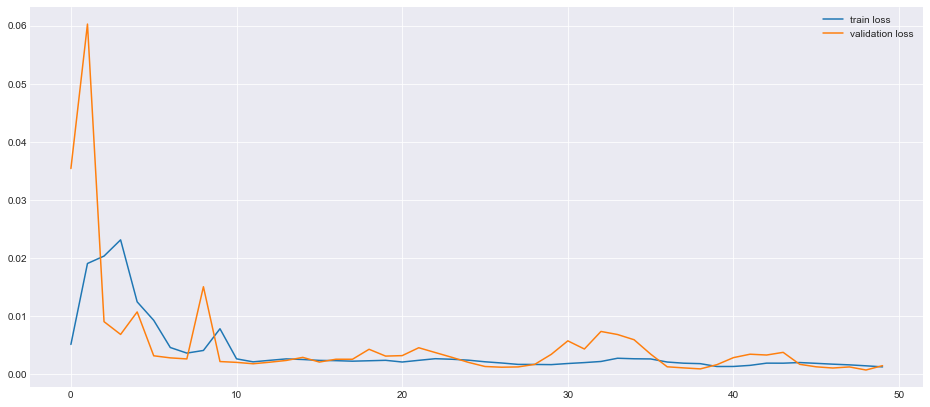

In [147]:
plt.figure(figsize=(16,7))
plt.plot(history.history["loss"], label= "train loss")
plt.plot(history.history["val_loss"], label= "validation loss")
plt.legend()

In [148]:
train_predict = regressor.predict(X_train)
test_predict = regressor.predict(X_test)

5/5 [==============================] - 1s 108ms/step


In [149]:
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
train_predict_inv = scaler.inverse_transform(train_predict)
test_predict_inv = scaler.inverse_transform(test_predict)

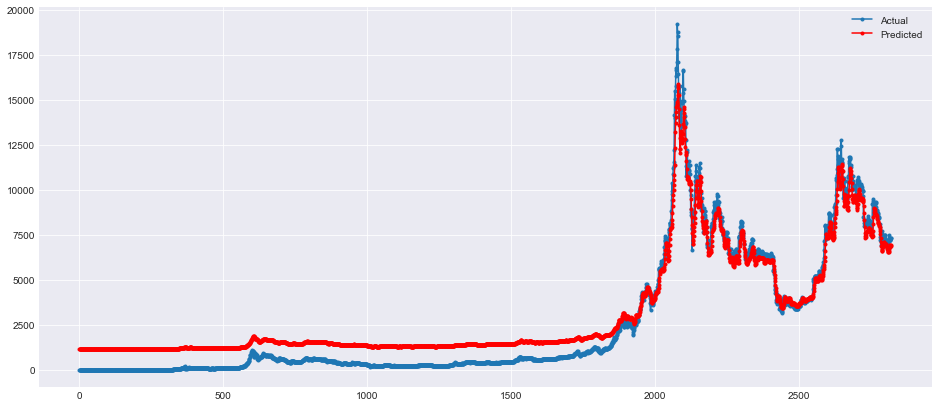

In [150]:
plt.figure(figsize=(16,7))
plt.plot(y_train_inv.flatten(), marker='.', label="Actual")
plt.plot(train_predict_inv.flatten(), 'r', marker='.', label="Predicted")
plt.legend()

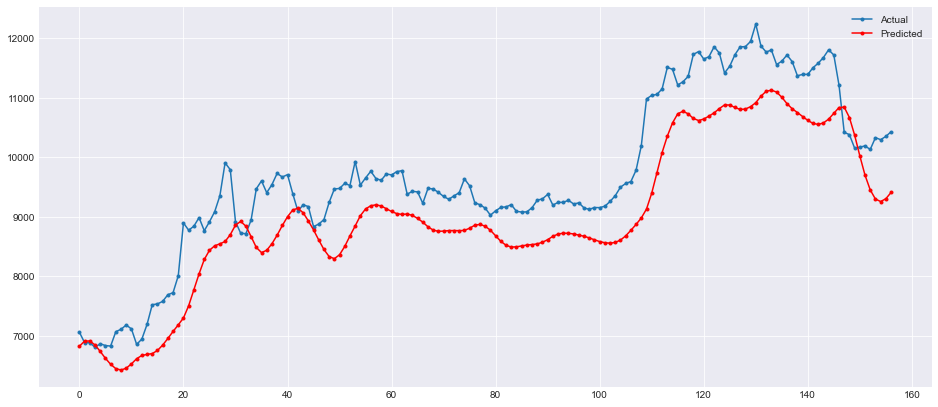

In [151]:
plt.figure(figsize=(16,7))
plt.plot(y_test_inv.flatten(), marker='.', label="Actual")
plt.plot(test_predict_inv.flatten(), 'r', marker='.', label="Predicted")
plt.legend()

In [152]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

train_RMSE = np.sqrt(mean_squared_error(y_train, train_predict))
test_RMSE = np.sqrt(mean_squared_error(y_test, test_predict))
train_MAE = np.sqrt(mean_absolute_error(y_train, train_predict))
test_MAE = np.sqrt(mean_absolute_error(y_test, test_predict))


print(f"Train RMSE: {train_RMSE}")
print(f"Train MAE: {train_MAE}")

print(f"Test RMSE: {test_RMSE}")
print(f"Test MAE: {test_MAE}")

Train RMSE: 0.049224128786582916
Train MAE: 0.21083464699992754
Test RMSE: 0.039868314254104996
Test MAE: 0.18908401015868145
